In [3]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'


In [55]:
def probability_dist(threshold=0.001):
    val = np.random.random()
    if val < threshold:
        return 0
    else:
        return val
    
    
def process(t_minus_1_val=1, threshold=0.001):
    if t_minus_1_val == 0:
        return 0
    else:
        return probability_dist(threshold=threshold)
    
    
def run_single_experiment_non_ergodic_process(epochs=1000):
    
    t_minus_1_val = 1
    outcomes = []
    for t in range(epochs):
        t_minus_1_val = process(t_minus_1_val=t_minus_1_val)
        outcomes.append(t_minus_1_val)
        
    return np.array(outcomes).mean()
    
    
def run_single_experiment_ergodic_process(epochs=1000):
    return np.random.random(size=epochs).mean()


def run_n_experiments(func, num_experiments=100, epochs_in_each_exp=1000):
    exp_means = []
    for i in range(num_experiments):
        exp_mean = func(epochs_in_each_exp)
        exp_means.append(exp_mean)
    return np.array(exp_means)

In [56]:
mean_1000_epochs = run_single_experiment_non_ergodic_process()

In [57]:
mean_1000_epochs

0.07498647985146036

In [58]:
run_single_experiment_ergodic_process()

0.49631721292016073

# Experiment 1: 1000 time steps

In [59]:
non_ergodic_means = run_n_experiments(run_single_experiment_non_ergodic_process)

In [60]:
ergodic_means = run_n_experiments(run_single_experiment_ergodic_process)

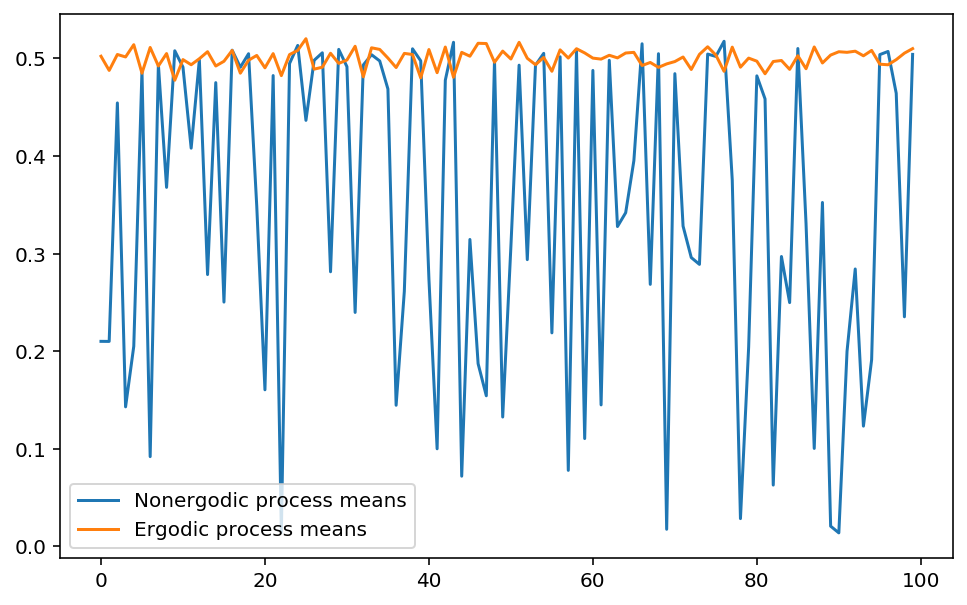

In [63]:
fig, ax = plt.subplots(figsize=(8,5))

plt.plot(non_ergodic_means)
plt.plot(ergodic_means)
plt.legend(['Nonergodic process means', 'Ergodic process means'])

# Experiment 2: 10,000 time steps

In [64]:
non_ergodic_means = run_n_experiments(run_single_experiment_non_ergodic_process, epochs_in_each_exp=10_000)

In [65]:
ergodic_means = run_n_experiments(run_single_experiment_ergodic_process, epochs_in_each_exp=10_000)

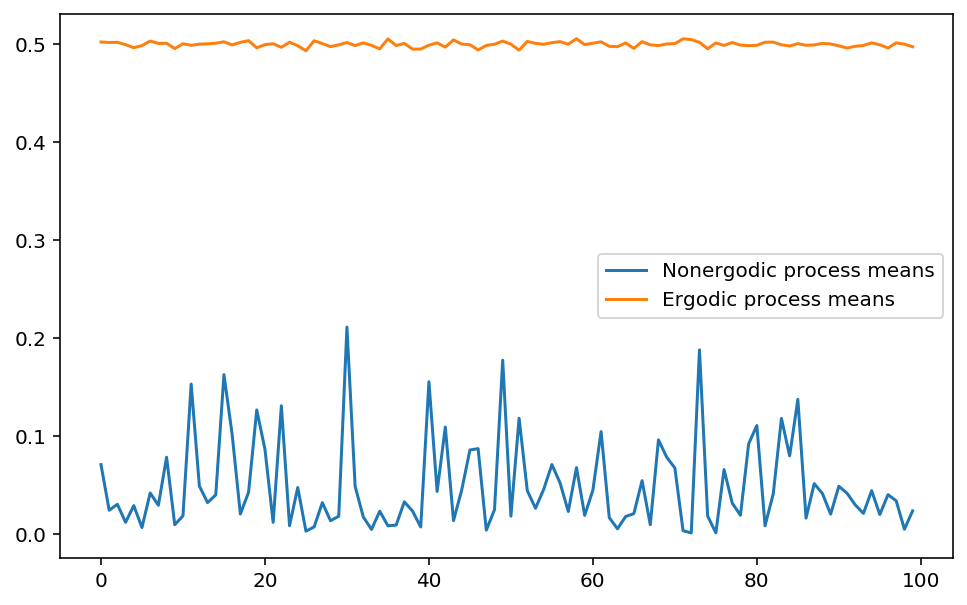

In [66]:
fig, ax = plt.subplots(figsize=(8,5))

plt.plot(non_ergodic_means)
plt.plot(ergodic_means)
plt.legend(['Nonergodic process means', 'Ergodic process means'])

# Experiment 3: 100,000 time steps

In [67]:
non_ergodic_means = run_n_experiments(run_single_experiment_non_ergodic_process, epochs_in_each_exp=100_000)

In [68]:
ergodic_means = run_n_experiments(run_single_experiment_ergodic_process, epochs_in_each_exp=100_000)

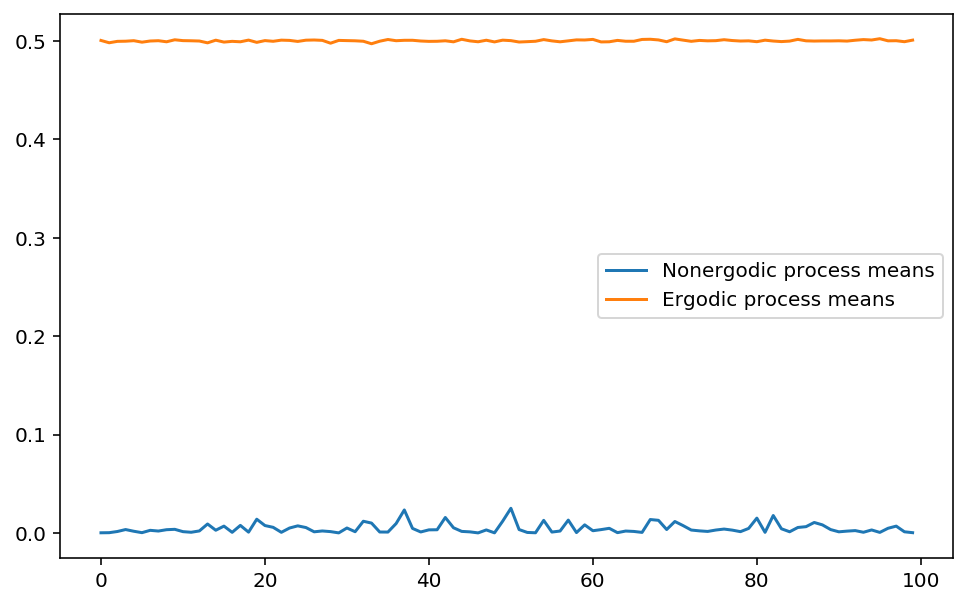

In [69]:
fig, ax = plt.subplots(figsize=(8,5))

plt.plot(non_ergodic_means)
plt.plot(ergodic_means)
plt.legend(['Nonergodic process means', 'Ergodic process means'])

# Experiment 4: non ergodic process means with increasing number of time steps

Text(0, 0.5, 'Expected Value')

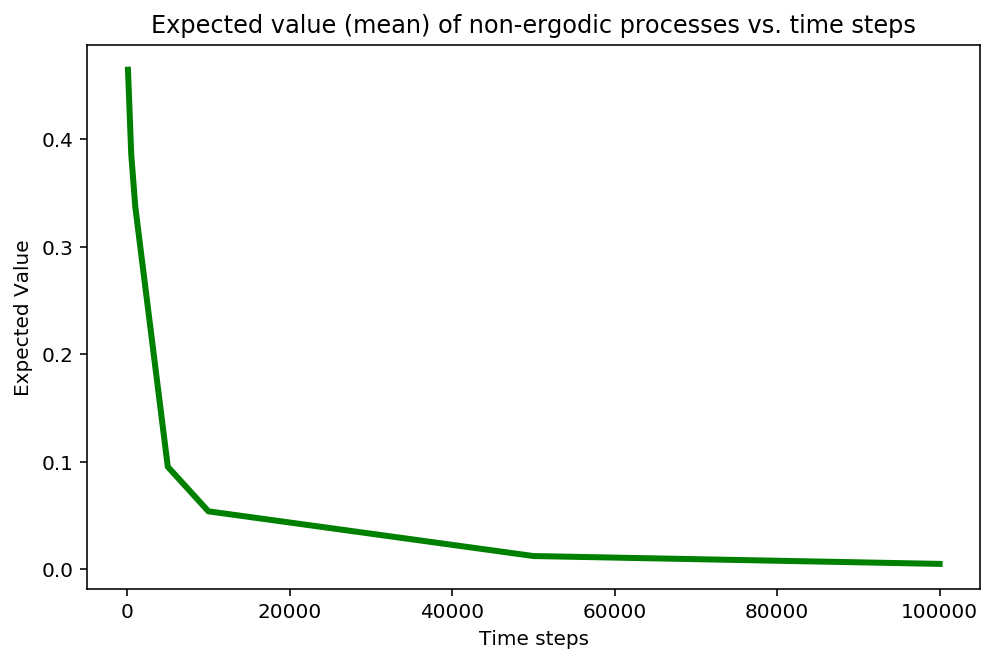

In [78]:
fig, ax = plt.subplots(figsize=(8,5))

plt.plot(
    list(non_ergodic_means_with_epoch.keys()), 
    list(non_ergodic_means_with_epoch.values()),
    c='g', lw='3'
)
plt.title('Expected value (mean) of non-ergodic processes vs. time steps')
plt.xlabel('Time steps')
plt.ylabel('Expected Value')

We can see above that as the number of time steps increase the expected value decreases. In other words, this is _very_ different from a coin toss example. In a coin toss example, even after seeing 10 heads in a row you are not _due_ for heads. The probability is still 1/2, and the expected value does not chance, because events are iid. In the case of a non ergodic process, we do not have independence and the expected value is reduced as the number of time steps increases.

See Skin in the Game, Taleb, Appendix. 

In [42]:
from scipy.stats import ks_2samp

In [43]:
x = np.zeros(50) + 1

In [45]:
y = np.zeros(30) + 1 

In [46]:
ks_2samp(x, y)

Ks_2sampResult(statistic=0.0, pvalue=1.0)